In [ ]:
import numpy as np 
import os
import h5py
import sys
sys.path.insert(0,'/global/common/cori/software/theano/0.8.2/lib/python2.7/site-packages/')
import theano
import theano.tensor as T
sys.path.insert(0,'/global/common/cori/software/keras/1.02/lib/python2.7/site-packages/')
import keras

import numpy as np

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.regularizers import l1
from keras import optimizers

import matplotlib.pyplot as plt

def load_data():

    # Load the dataset
    
    # Here we give different data sets for the autoencoders
    dataurl = '/global/homes/s/ssingh79/data/'
    #hdf5file = 'conv_z02.h5'
    hdf5file = 'segment128_data.h5'
    filepath = os.path.join(dataurl, hdf5file)
    
    print("Calling ", hdf5file, "......")
    # Call the load_data method to get back the Final training set. 
    dataset = filepath
    
    sample_size = 1000
    
    with h5py.File(dataset,'r') as hf:
        #train_set = hf['X_train'][0:1000,0:65536]
        train_set = hf['data_mean_diff_min'][0:1000,:]
        print("Printing Train set ", train_set)
        print("X_train shape ", train_set.shape)
   
    #Create Training set and Validation set: 80 : 20 Randomly Sampling the images. 
    X = np.random.choice(1000, 1000, replace=False)
    split_percent = 0.90  
    
    
    '''
    #print(X)
    #Get the random indices of images.  
    train_split = sample_size*split_percent
    train_index = X[0:train_split]
    valid_index = X[train_split:sample_size]
    
    train_x = train_set[train_index[:], : ]
    print("Training Set : ", train_x)
    print(train_x.shape) 
    
    valid_x = train_set[valid_index[:], : ]
    print("Validation Set : ", valid_x)
    print(valid_x.shape)
    
    return train_x, valid_x
    '''
    
    return train_set
    

def build_ae():

    encoding_dim = 12000
    
    input_img = Input(shape=(16384,))
    encoded = Dense(encoding_dim, init='normal', W_regularizer=l1(0.01), bias=True, activation ='relu', activity_regularizer=regularizers.activity_l1(10e-5))(input_img)
    decoded = Dense(16384, activation='relu')(encoded)
    
    
    #reconstruction mapping
    autoencoder = Model(input=input_img,output=decoded)
    
    print(autoencoder)
    
    #encoder model 
    encoder = Model(input=input_img, output=encoded)

    #decoder model
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    
    sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.6, nesterov=True)
    autoencoder.compile(optimizer=sgd, loss='mean_squared_error')
    
    #x_train, x_valid = load_data()
    
    x_train = load_data()
    
    #print(x_train[0].reshape(128,128))
    print(x_train.shape)
    
    #Train autoencoder
    autoencoder.fit(x_train,x_train,
                   nb_epoch=50,
                   batch_size=256,
                   shuffle=True,
                   validation_split=0.1
                   )
    
    print("Weights Learnt by the autoencoder : ", autoencoder.get_weights())
    
    print(x_train.shape)
    encoded_imgs = encoder.predict(x_train)
    decoded_imgs = decoder.predict(encoded_imgs)
    
    print(x_train[0].reshape(128,128))
    print(decoded_imgs[0].reshape(128,128))
        
    %matplotlib inline
    plt.subplot(121)
    plt.imshow(x_train[0].reshape(128,128), interpolation = 'None')
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(decoded_imgs[0].reshape(128,128), interpolation = 'None')
    plt.colorbar()
   
build_ae()


Using Theano backend.


Calling  segment128_data.h5 ......
Printing Train set  [[ 0.07137257  0.30928497  0.29827089 ...,  0.18230421  0.14637361
   0.15919079]
 [ 0.07261577  0.17558717  0.20363968 ...,  0.0669994   0.09018772
   0.0591026 ]
 [ 0.13344094  0.47484278  0.41672827 ...,  0.20851207  0.14027942
   0.13089442]
 ..., 
 [ 0.07298076  0.1915159   0.17968826 ...,  0.22934989  0.14364741
   0.13065976]
 [ 0.06373761  0.26115087  0.3418177  ...,  0.1024105   0.12914529
   0.13198031]
 [ 0.0415752   0.15119068  0.13141891 ...,  0.13405803  0.11238554
   0.17102517]]
X_train shape  (1000, 16384)
(1000, 16384)


In [7]:
import sys
print(sys.path)

['/global/common/cori/software/keras/1.02/lib/python2.7/site-packages/', '/global/common/cori/software/theano/0.8.2/lib/python2.7/site-packages/', '/global/common/cori/software/keras/1.02/lib/python2.7/site-packages/', '/global/common/cori/software/theano/0.8.2/lib/python2.7/site-packages/', '/global/common/cori/software/keras/1.02/lib/python2.7/site-packages/', '/global/common/cori/software/theano/0.8.2/lib/python2.7/site-packages/', '/global/common/cori/software/keras/1.02/lib/python2.7/site-packages/', '/global/common/cori/software/theano/0.8.2/lib/python2.7/site-packages/', '', '/usr/local/src/jupyterhub', '/anaconda3/lib/python35.zip', '/anaconda3/lib/python3.5', '/anaconda3/lib/python3.5/plat-linux', '/anaconda3/lib/python3.5/lib-dynload', '/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg', '/anaconda3/lib/python3.5/site-packages/setuptools-20.7.0-py3.5.egg', '/anaconda3/lib/python3.5/site-packages', '/anaconda3/lib/python3.5/site-packages/IPython/extensions', '/glob

In [2]:
import numpy as np 

A = np.arange(10)
B = np.arange(20,30,1)
C = np.arange(30,40,1)
D = np.vstack((A,B,C)) 

print (D)

E = np.reshape(D,(1,30))
print(E)
E = np.reshape(E,(3,10))
print(E)


size = 5
print(E[0:2,0:size])

[[ 0  1  2  3  4  5  6  7  8  9]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]
[[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
  34 35 36 37 38 39]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]
[[ 0  1  2  3  4]
 [20 21 22 23 24]]


In [10]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
print(A)

[0 1 2 3 4 5 6 7 8 9]


In [12]:
B

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [6]:
import sklearn.cross_validation as cv
import numpy as np

X = np.arange(100)

x_train, x_valid = cv.train_test_split(X, test_size=0.2, random_state = 42)

print(x_train)
print(x_valid)

[55 88 26 42 69 15 40 96  9 72 11 47 85 28 93  5 66 65 35 16 49 34  7 95 27
 19 81 25 62 13 24  3 17 38  8 78  6 64 36 89 56 99 54 43 50 67 46 68 61 97
 79 41 58 48 98 57 75 32 94 59 63 84 37 29  1 52 21  2 23 87 91 74 86 82 20
 60 71 14 92 51]
[83 53 70 45 44 39 22 80 10  0 18 30 73 33 90  4 76 77 12 31]


In [1]:
import numpy as np 
X = np.random.choice(1000, 1000, replace=False)
print(X)

sample_size = 1000
split_percent = 0.80  
train_split = 1000*split_percent

train_index = X[0:train_split]
valid_index = X[train_split:sample_size]

print("Training : ", train_index)
print("Validation : ", valid_index)

train_set = np.random.random((1000, 4096))
print (train_set)
train_x = train_set[train_index[:], : ]
print("Training Set : ", train_x)
print(train_x.shape)
valid_x = train_set[valid_index[:], : ]
print("Validation Set : ", valid_x)
print(valid_x.shape)


[779 562  54 575 682 596  22 898 656 326 835 542 294 793 472 981  19 425
 707  87  42 777 308 826 739  79 741 970 552 841 992 570 892  88  46 243
 878 848 611 348 347 257 402 267 884 161 759 547 345 550 232 522 549 229
 990 510  81  38 752 225 789 506 875 554 480 166 194 192 222 691 610 771
 854 385 806 642 821 890 131 514 805 248 756 782 527 839   6 901 836 915
 157 922 459 207 904 323 215 940 116 417 412 230 121 217 211 798 913 482
 173 706 967 744  70 291 742  26 576 688 599 286 177 606 746 728 337 501
  47 718 847 768 560 650 149 973 362 794 410 543 133 419 770 139  43 719
 663  86 871  37 784 734 478 817 444 240 467 945 351 280 918 490 534 437
 200  23 181 283  98 857  80 195 397 155 147 169  33 816 592 101 371  52
 852 767 928 320 305 340 619  11 989 927  56 536 342 923 287 318 427 872
 725 674 507 988 795 654 491 127 253 764 812 867 776 586 769 613 692 639
 302 896 591 582  78 842 578 523  76 791 601 447 165 494 198 855   9 809
 366  12 564  40 386 400 813 119 968 235  64 538 29

/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [21]:
print(X.shape)

(1000,)


[  1.94631866e-10   0.00000000e+00   1.67699810e-02 ...,   9.45874490e-11
   5.14200516e-03   1.07936310e-02]


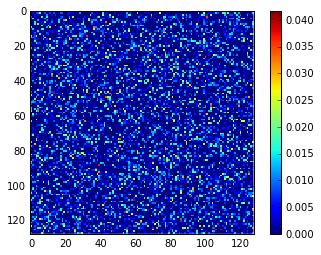

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

with h5py.File('/global/homes/s/ssingh79/out_images.h5','r') as hf:
    read_imgs = hf['decoded_imgs'][0,:]
    print(read_imgs)
    
%matplotlib inline
plt.imshow(np.reshape(read_imgs,(128,128)), interpolation = 'None')
plt.colorbar()

[ 0.07137257  0.30928497  0.29827089 ...,  0.18230421  0.14637361
  0.15919079]


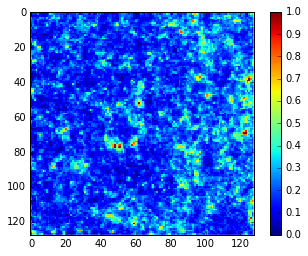

In [2]:
import h5py
with h5py.File('/global/homes/s/ssingh79/temp_train_data.h5','r') as hf:
    read_imgs = hf['x_train'][0,:]
    print(read_imgs)
    
%matplotlib inline
plt.imshow(np.reshape(read_imgs,(128,128)), interpolation = 'None')
plt.colorbar()

In [1]:

encoding_dim = 8000    
input_img = Input(shape=(16384,))
encoded = Dense(encoding_dim, activation ='relu', activity_regularizer=regularizers.activity_l2(10e-5))(input_img)
decoded = Dense(16384, activation='relu')(encoded)

#reconstruction mapping
autoencoder = Model(input=input_img,output=decoded)

    

NameError: name 'Input' is not defined

In [12]:
autoencoder.fit?

Object `autoencoder.fit` not found.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

X = np.random.random((50,50))

plt.imshow(X, interpolation = 'None')
plt.savefig('demo.png')
plt.close()

Y = np.random.random((25,25))
plt.imshow(Y, cmap= 'Greys_r')
plt.savefig('demo1.png')
plt.close()